# Week 4: NLP Disaster Tweets Kaggle Mini-Project

## Brief Description
### This challenge involves processing tweets and categorizing them as to whether they were made in reference to an actual disaster or not. In order to convert the tweets into a format that can be processed by our model, we use Natural Language Processing (NLP), which converts human-readable text into values that can be understood and manipulated by a computer, and vice-versa. Our training data comes in with 5 columns - an "id" column for each tweet's ID number, an optional "keyword" column that contains a word from the tweet that is particularly disaster-related, an optional "location" column that contains the tweet author's location as listed in their account, a "text" column that contains the text of the tweet, and finally a "target" column that identifies whether the tweet is disaster-related or not using a 0 or 1. Our testing data contains all of the same columns, with the exception of the "target" column, as we must determine that ourselves. Our training data comes in with 7613 tweets (each tweet gets a row of data), and our testing data comes in with 3263 tweets.

In [1]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Head of train data:\n\n{train_df.head()}\n\n")
print(f"Head of test data:\n\n{test_df.head()}\n\n")

print(f"Shape of train data: {train_df.shape}\n")
print(f"Shape of test data: {test_df.shape}\n")

Head of train data:

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


Head of test data:

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 2

## Exploratory Data Analysis
### Looking at our data, we found N/A values in the "keyword" and "location" columns, so we will need to decide what to do with these. For the "location" column, the data has so few common locations and so many missing values that I just decided to drop the column altogether, as I felt like the model wouldn't be able to learn much meaningful information from it. Additionally, the "keyword" column is basically redundant, as it just contains a word that already exists in the "text" column. Thus, there isn't really anything meaningful we can do with it in this case, so I decided to drop that column as well. Finally, looking at our distribution of "target" values in the training data, about 57% were false and 43% were true, which seems reasonable and doesn't throw up any red flags.

N/A values by column (training data):
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

N/A values by column (testing data):
id             0
keyword       26
location    1105
text           0
dtype: int64



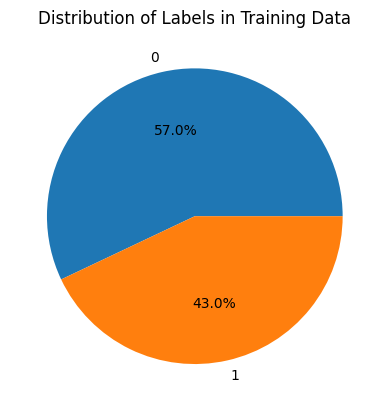

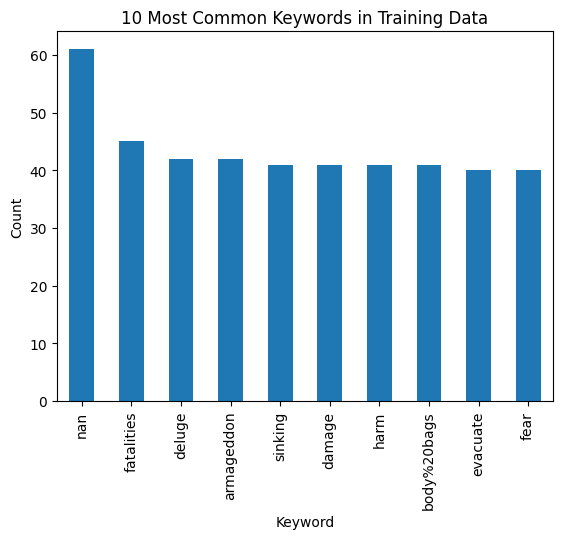

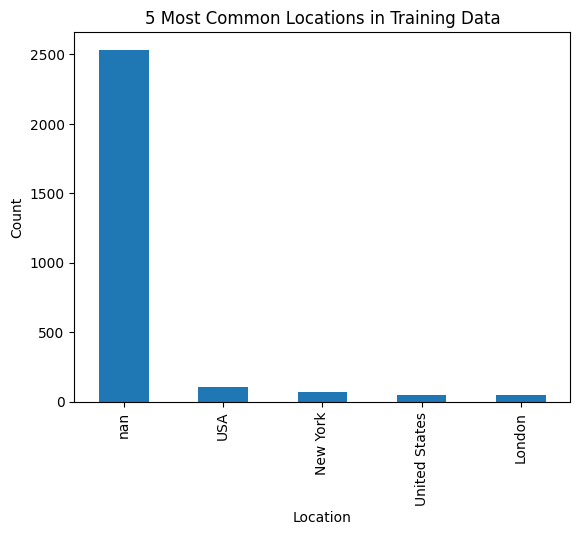

In [2]:
import matplotlib.pyplot as plt

na_cols = train_df.isna().sum()
print(f"N/A values by column (training data):\n{na_cols}\n")

na_cols = test_df.isna().sum()
print(f"N/A values by column (testing data):\n{na_cols}\n")

target_counts = train_df["target"].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Labels in Training Data")
plt.show()

keyword_counts = train_df["keyword"].value_counts(dropna=False)[0:10]
keyword_counts.plot(kind="bar")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.title("10 Most Common Keywords in Training Data")
plt.show()

loc_counts = train_df["location"].value_counts(dropna=False)[0:5]
loc_counts.plot(kind="bar")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("5 Most Common Locations in Training Data")
plt.show()

train_df.drop("keyword", axis=1, inplace=True)
test_df.drop("keyword", axis=1, inplace=True)

train_df.drop("location", axis=1, inplace=True)
test_df.drop("location", axis=1, inplace=True)

## Model Architecture
### t

In [5]:
from keras_nlp.tokenizers import WordPieceTokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df["text"], df["target"], test_size=0.2, random_state=64)

tok = WordPieceTokenizer()
tok.adapt(X_train)

X_train_seq = tok(X_train)
X_val_seq = tok(X_val)

max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_val_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)

vocab_size = tok.vocab_size() + 1

model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    GRU(units=32, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation="sigmoid")
])

model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# TODO: model2 and model3

ModuleNotFoundError: No module named 'keras_nlp.tokenizers'

## Results and Analysis
### t

In [ ]:
from sklearn.metrics import f1_score
import time

time1 = time.time()
model1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))
time2 = time.time() - time1

y_pred = model1.predict(X_val)
y_pred = (y_pred > 0.5).astype("int32")

f1 = f1_score(y_val, y_pred, average="binary")
print(f"\nF1 score for first model: {f1}\n")

## Conclusion
### t